# Temperature Forecast Project using ML

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [29]:
# Importing some neccessary liabraries which will help us to understand and visualize data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv("temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [31]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [32]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [33]:
df.sample(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
18,19.0,30-06-2013,31.4,22.8,52.265926,75.483757,29.273668,24.970151,6.359286,36.339969,...,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5893.578125,31.8,21.6
2470,21.0,05-08-2014,29.0,24.7,70.358223,85.251076,27.784358,24.672982,4.812067,18.857038,...,0.003686,0.092687,0.002286,37.5507,127.040,26.2980,0.5721,5293.375000,26.4,22.4
6031,7.0,24-08-2016,32.0,27.1,56.601707,88.176758,29.711999,25.408253,5.763840,151.630919,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,4634.287598,31.9,23.3
4289,15.0,16-08-2015,31.3,20.7,29.526825,81.813683,33.506905,22.005116,6.475477,35.931631,...,0.000000,0.001459,0.000000,37.5507,126.937,30.0464,0.8552,4978.878418,32.2,20.7
1562,13.0,30-06-2014,29.4,22.7,36.550583,72.631874,32.745617,22.389629,5.969859,32.558522,...,0.000000,0.000000,0.000000,37.5776,127.083,59.8324,2.6865,5861.027344,32.3,21.9


In [34]:
df.shape

(7752, 25)

In [35]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [36]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

as we can see that there is a null values

<AxesSubplot:>

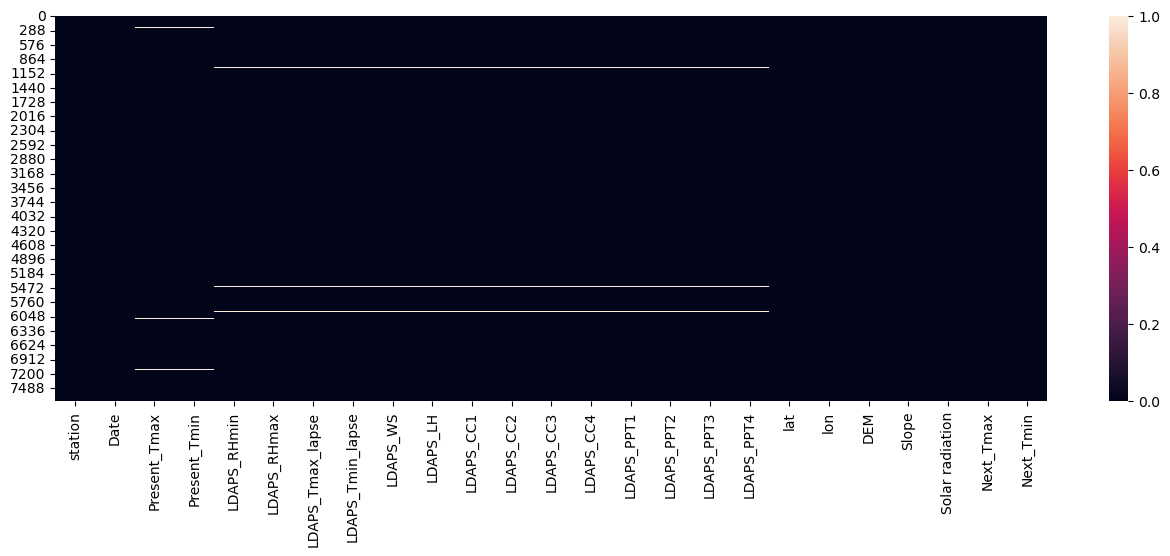

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(df.isnull()) #Looking for null values if any, in heatmap

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


as we can see that ,1 object and all other numerical columns are present in data

In [39]:
# dropping all null values
df=df.dropna()
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

all null values have been removed

<AxesSubplot:>

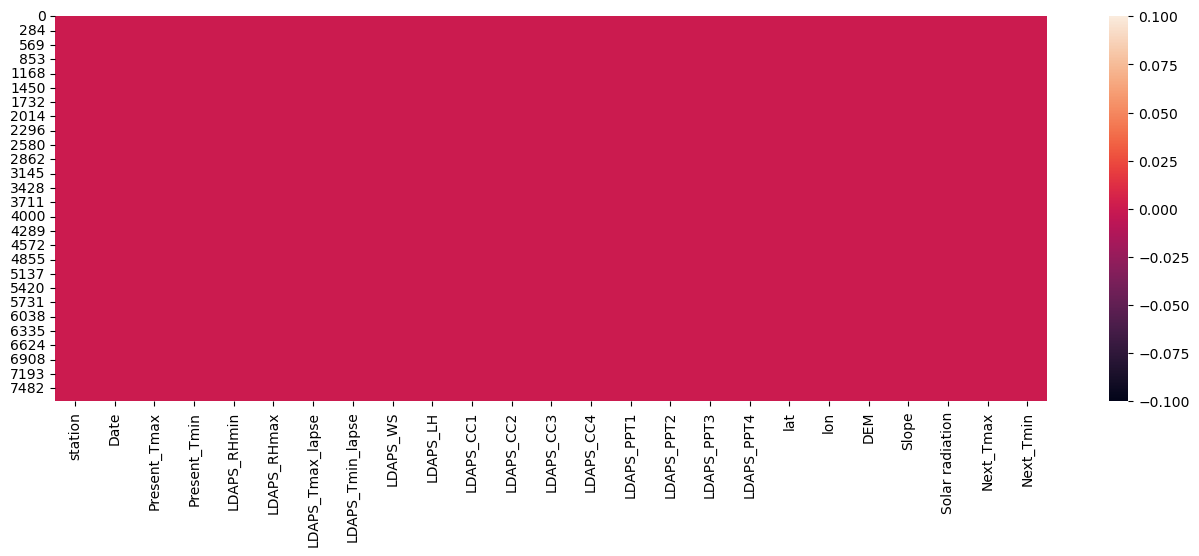

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sns.heatmap(df.isnull())

there is no null values

In [41]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


# EDA

In [42]:
dfcor=df.corr()

<AxesSubplot:>

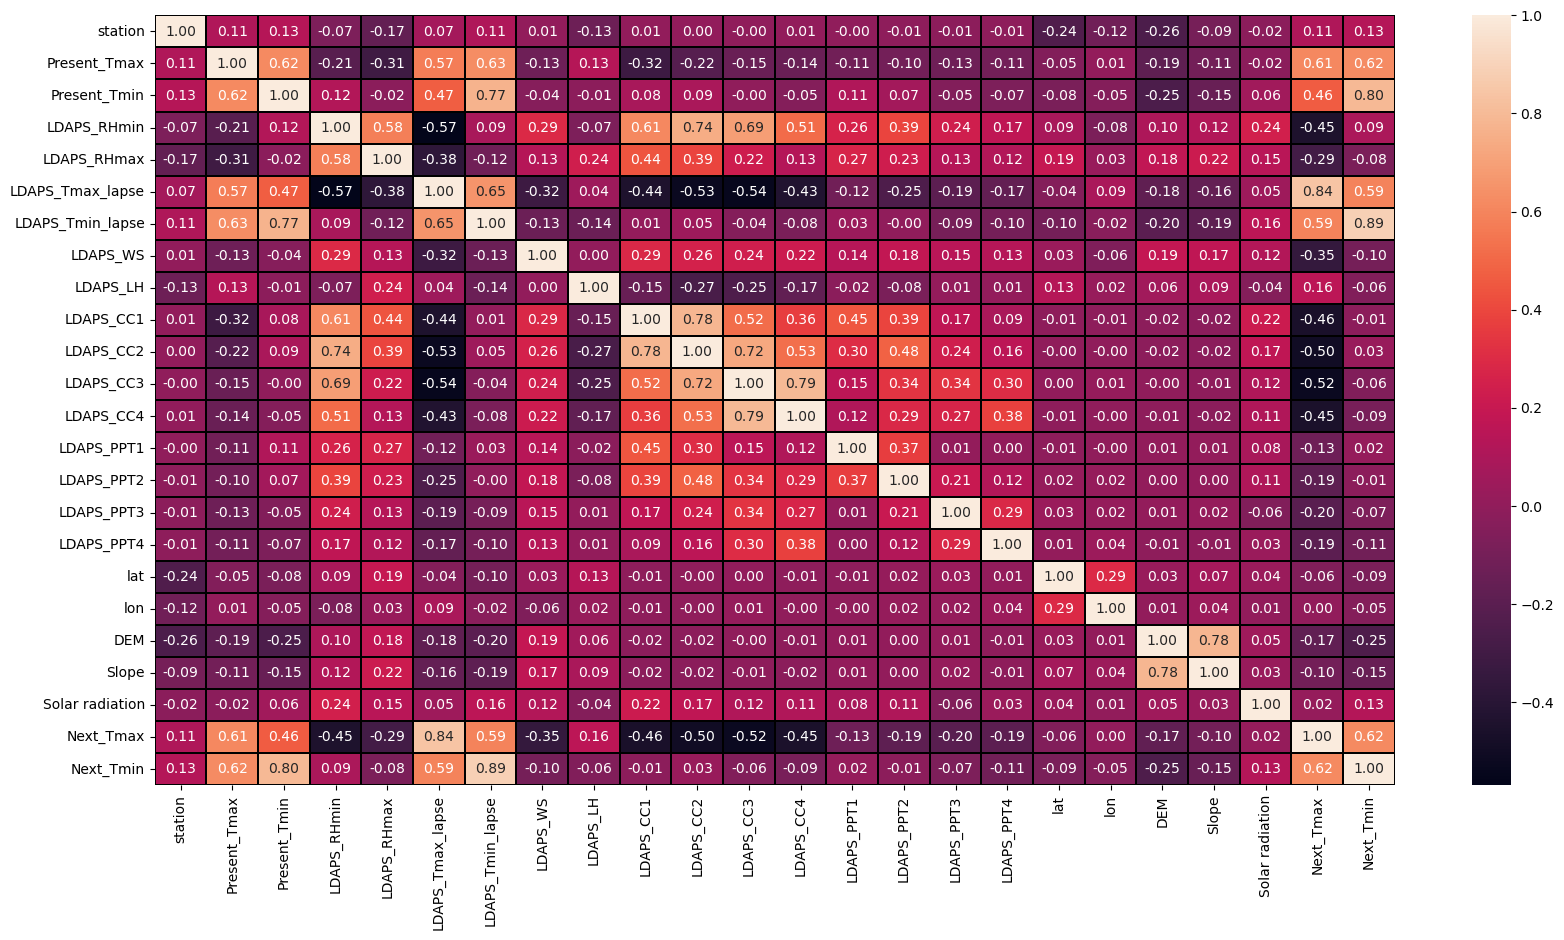

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

We can see here Present_Tmax and Present_Tmin are highly correlated with Target variables, LDAPS_RHmin and LDAPS_RHmax are also highly correlated with target variables, Next_Tmin and Next_Tmax are also highly correlated with exch other, most of the columns are negatively correlated with target variables.

In [44]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

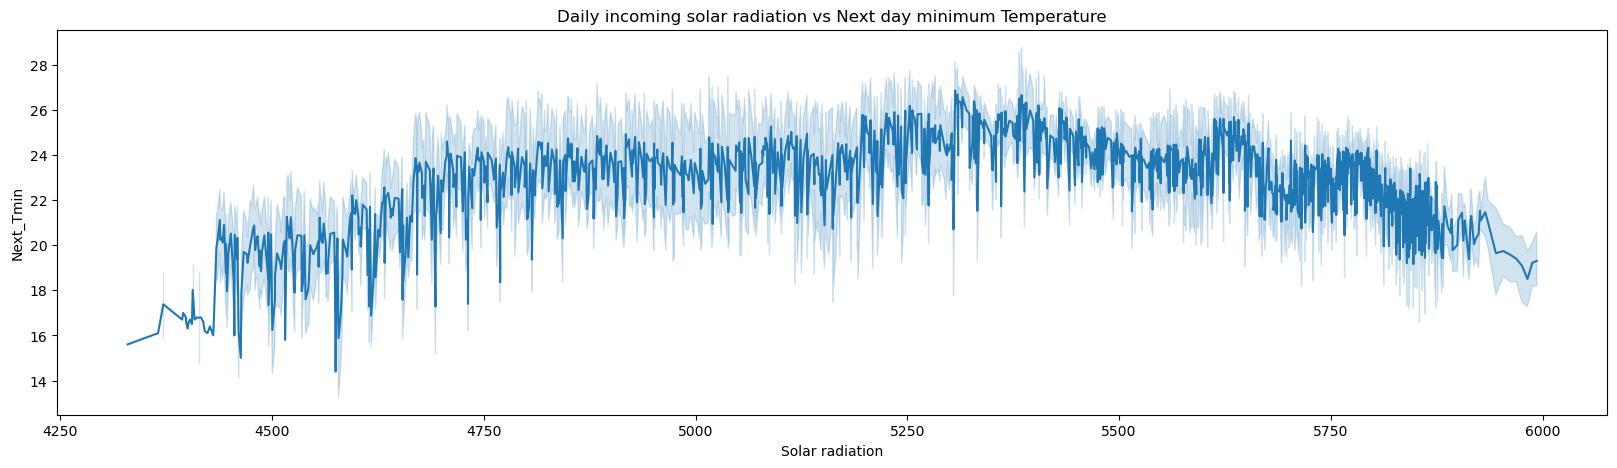

In [45]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.show()

here, we can see that, the next day minimum temparature is frequently increases.

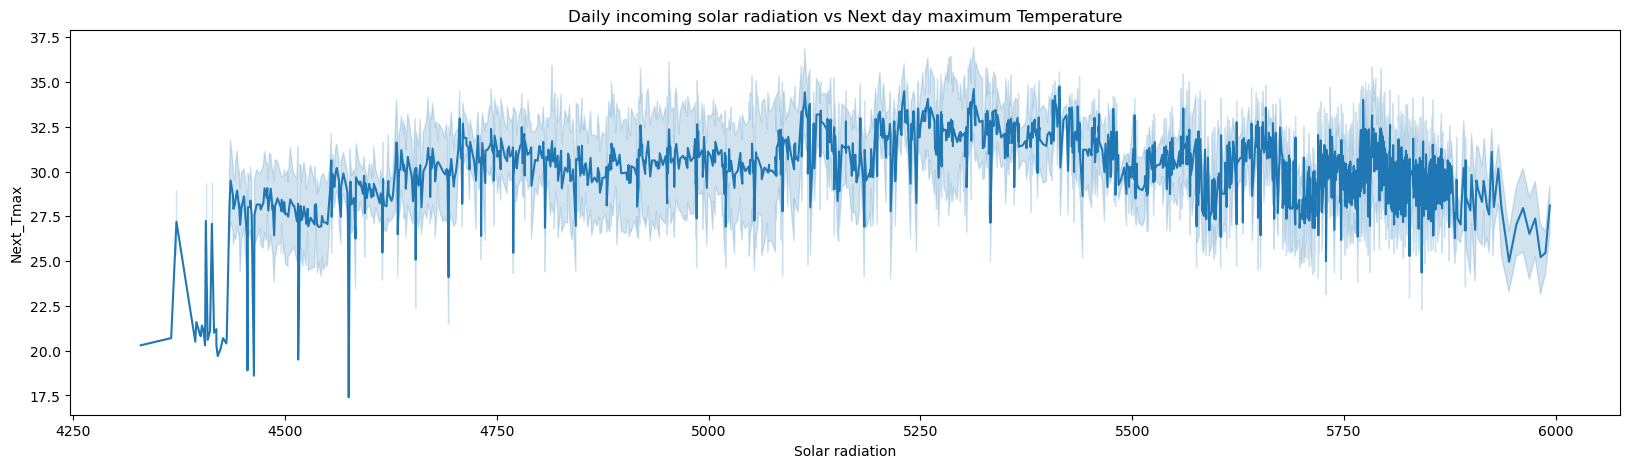

In [46]:
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

here, we can see that, the next day maximum temparature is frequently increases

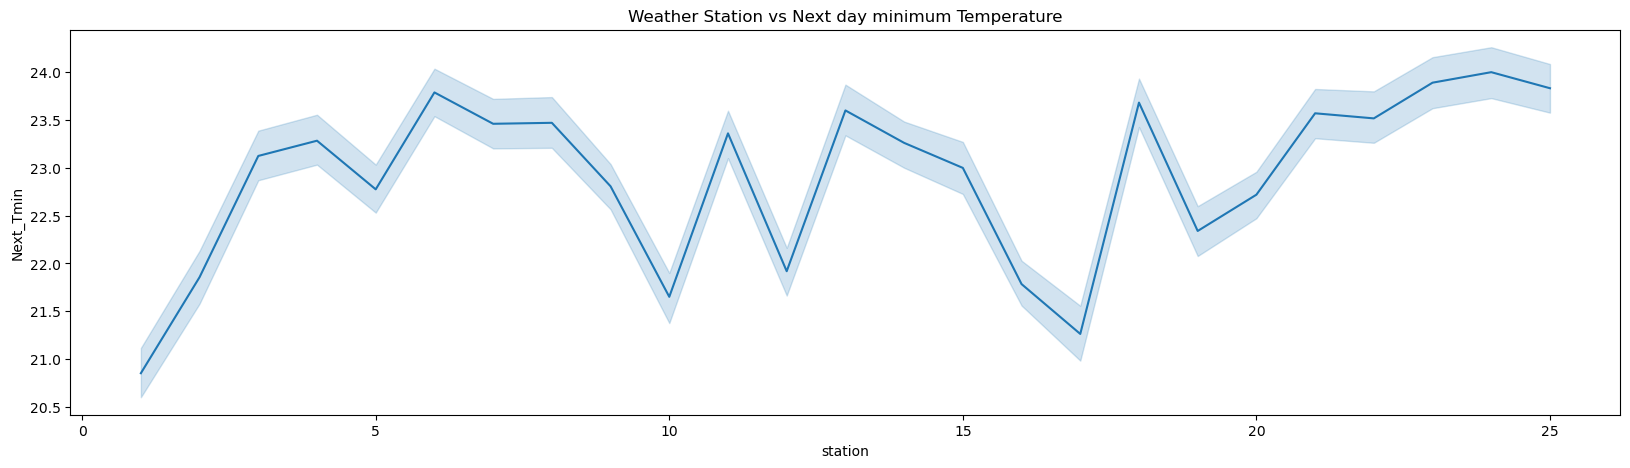

In [47]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

here, we can see that,the line plot clears that next day minimum temparature is high & low at station 18 & 17 respectively.

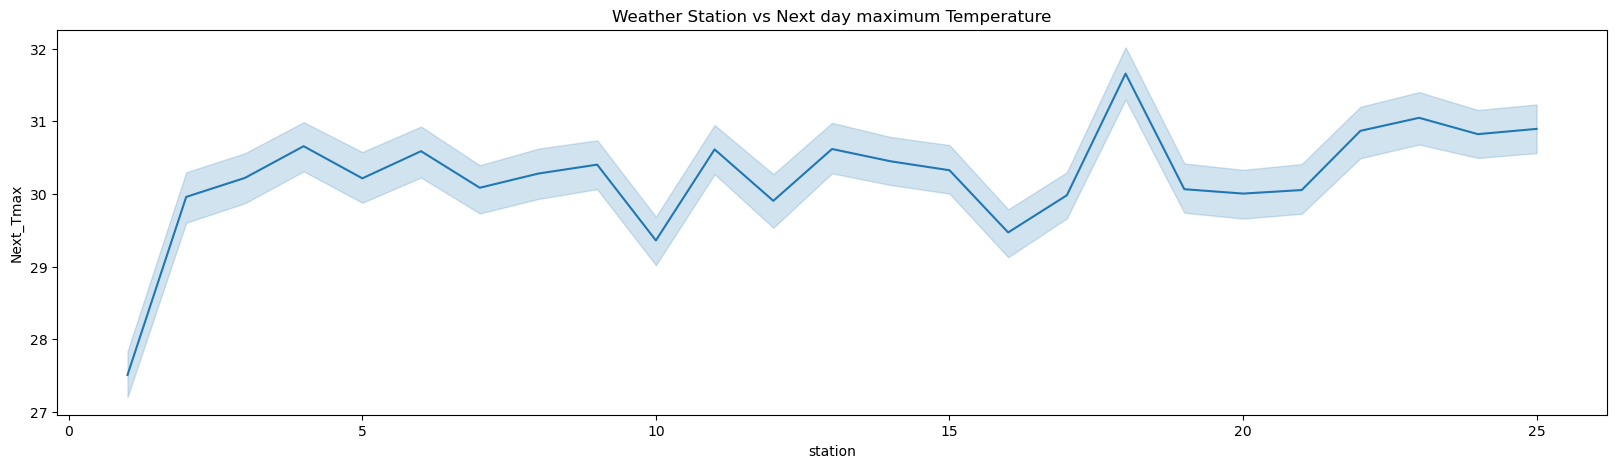

In [48]:
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

here, we can see that,the line plot clears that next day maximum temparature is high & low at station 18 & 10 respectively.

Text(0, 0.5, 'Next_Tmax')

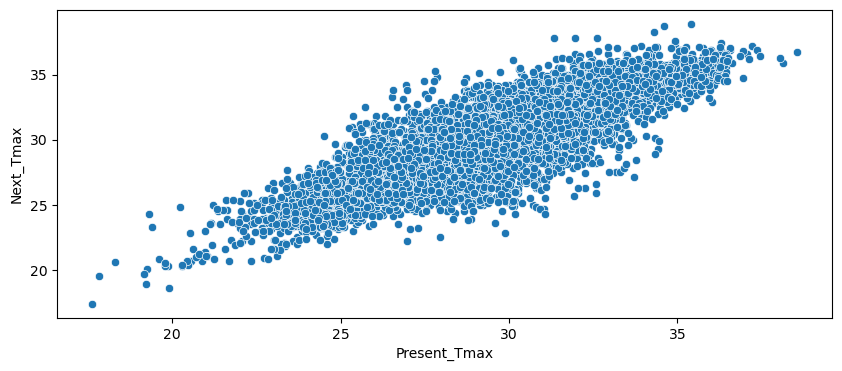

In [49]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

as we can see that,With LDAPS_Tmax_lapse temp is also getting higher

Text(0, 0.5, 'Next_Tmin')

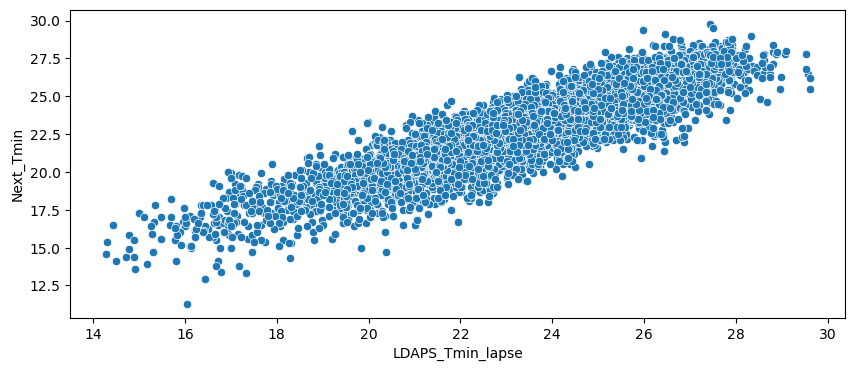

In [50]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

We Can see here with LDAPS_Tmin_lapse temp is also getting lower

Text(0, 0.5, 'Next_Tmin')

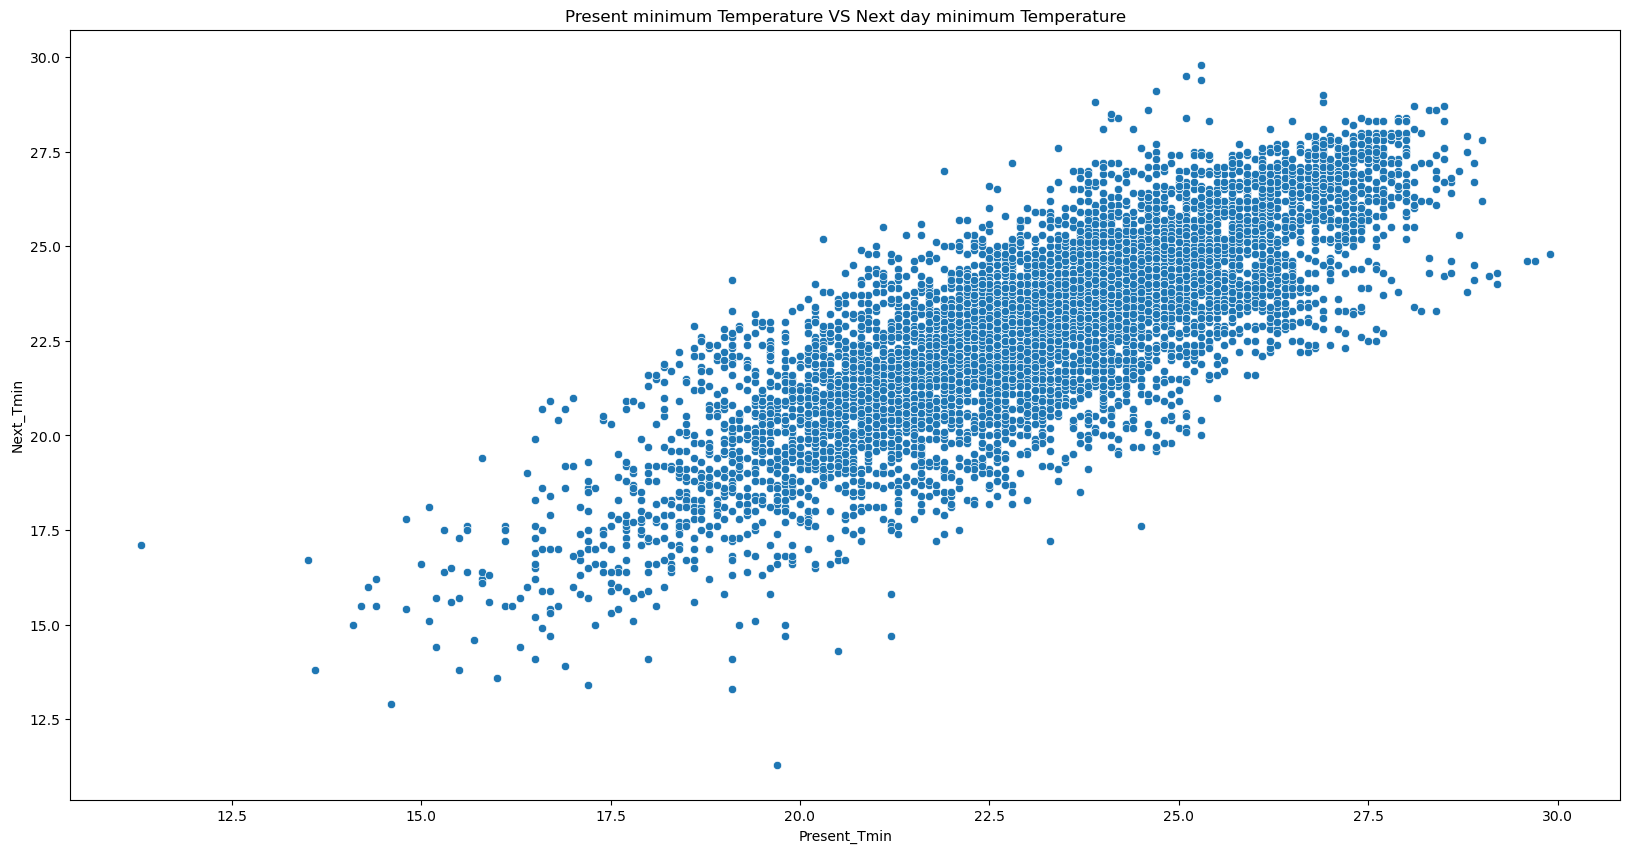

In [51]:
# Scatterplot Display distribution of data across Present minimum Temperature VS Next day minimum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

Here we can notice when Present_Tmin In decreasing , Next_Tmin also getting lower

Text(0, 0.5, 'Next_Tmax')

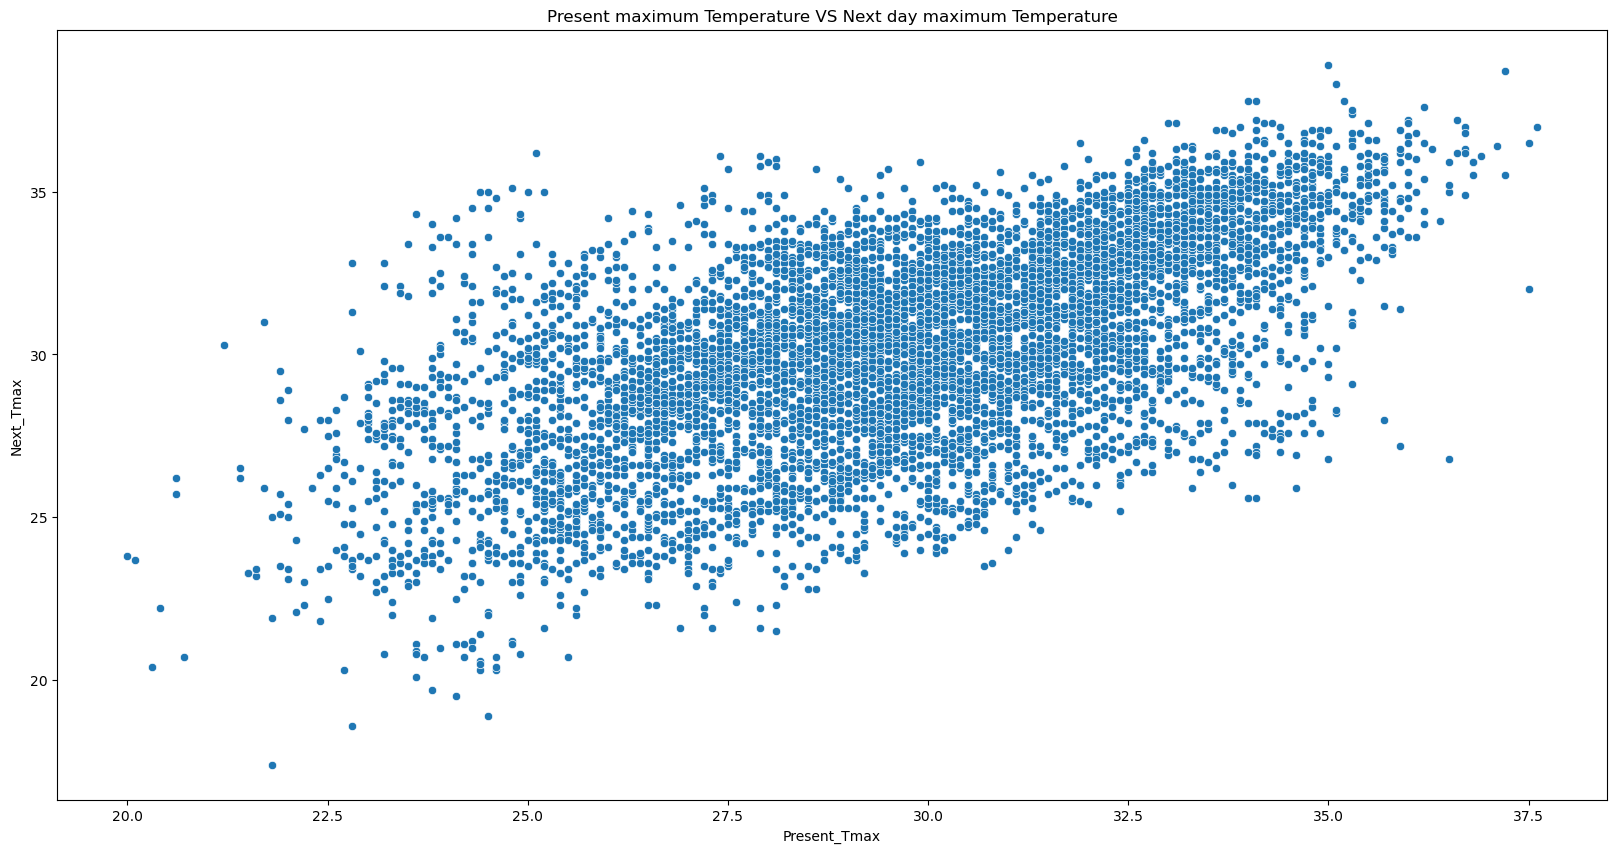

In [52]:
# Scatterplot Display distribution of data across Present maximum Temperature VS Next day maximum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Here we can see when Present_Tmax is increasing Nex_Tmax is also getting higher

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

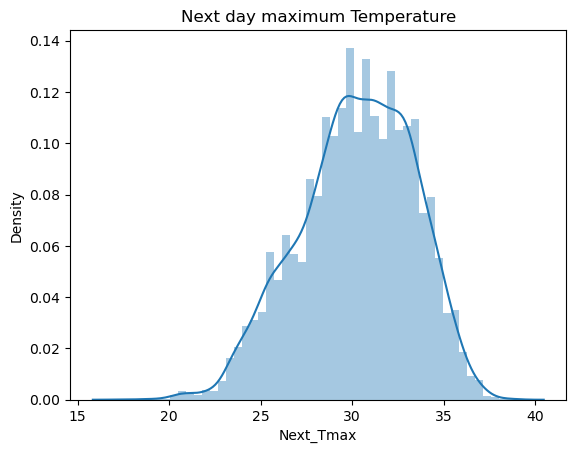

In [53]:
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The distplot clears that next day maximum temparature distribution is lies between 22 to 37.

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

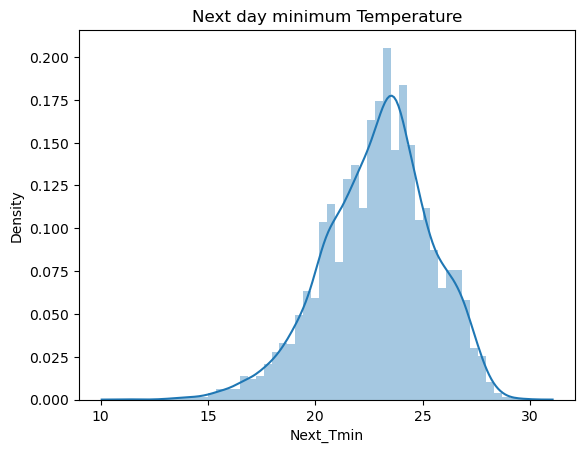

In [54]:
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

as we can see that,the distplot clears that next day minimum temparature distribution is lies between 15 to 28.

In [55]:
import datetime as ddt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(ddt.datetime.toordinal)
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [56]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Using LabelEncoder

In [57]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Outliers Handling

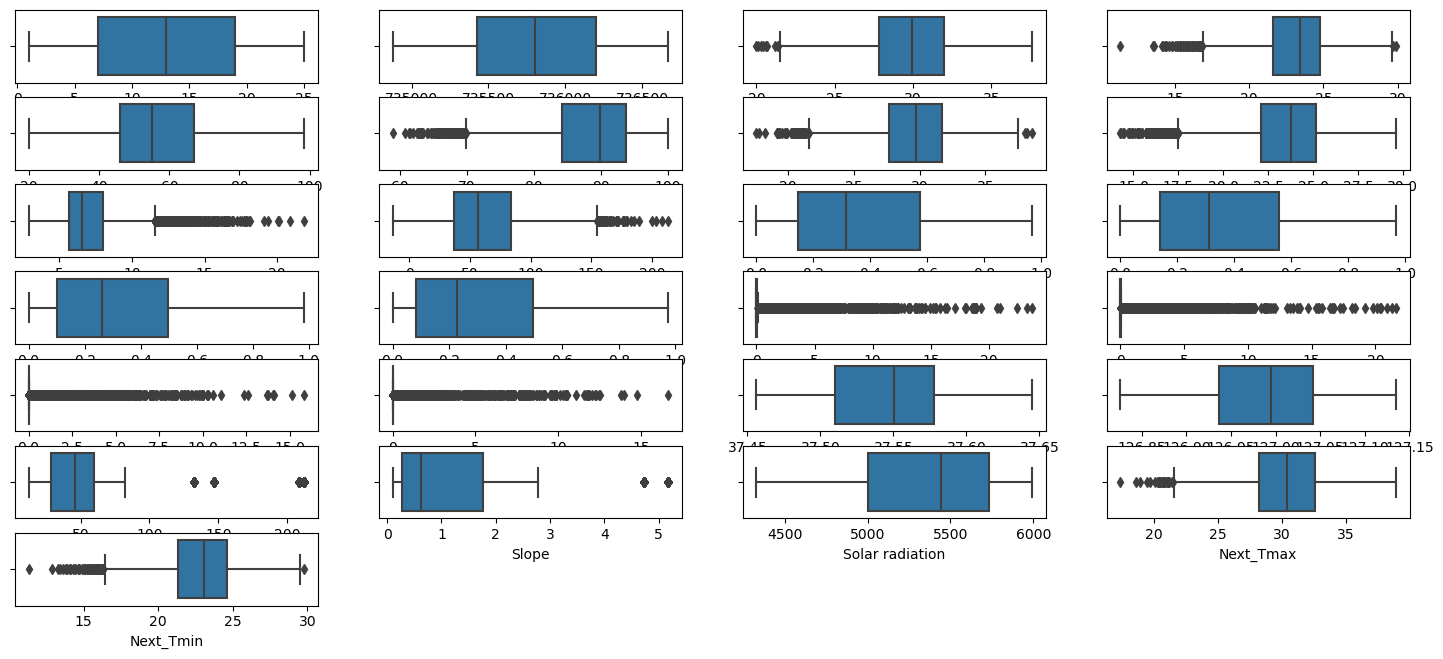

In [58]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

as we can see that,Only some of columns seems having outliers after skewness removed .

# outliers removal

zscore

In [59]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))


In [60]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (7588, 25)
After removing outliers:: (6739, 25)


# IQR

In [61]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR

37.2645068965

In [62]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2095, 25)


choosing ZSCORE because there is huge dataloss in IQR

In [63]:
df=df_1
df.shape

(6739, 25)

# Skewness handling

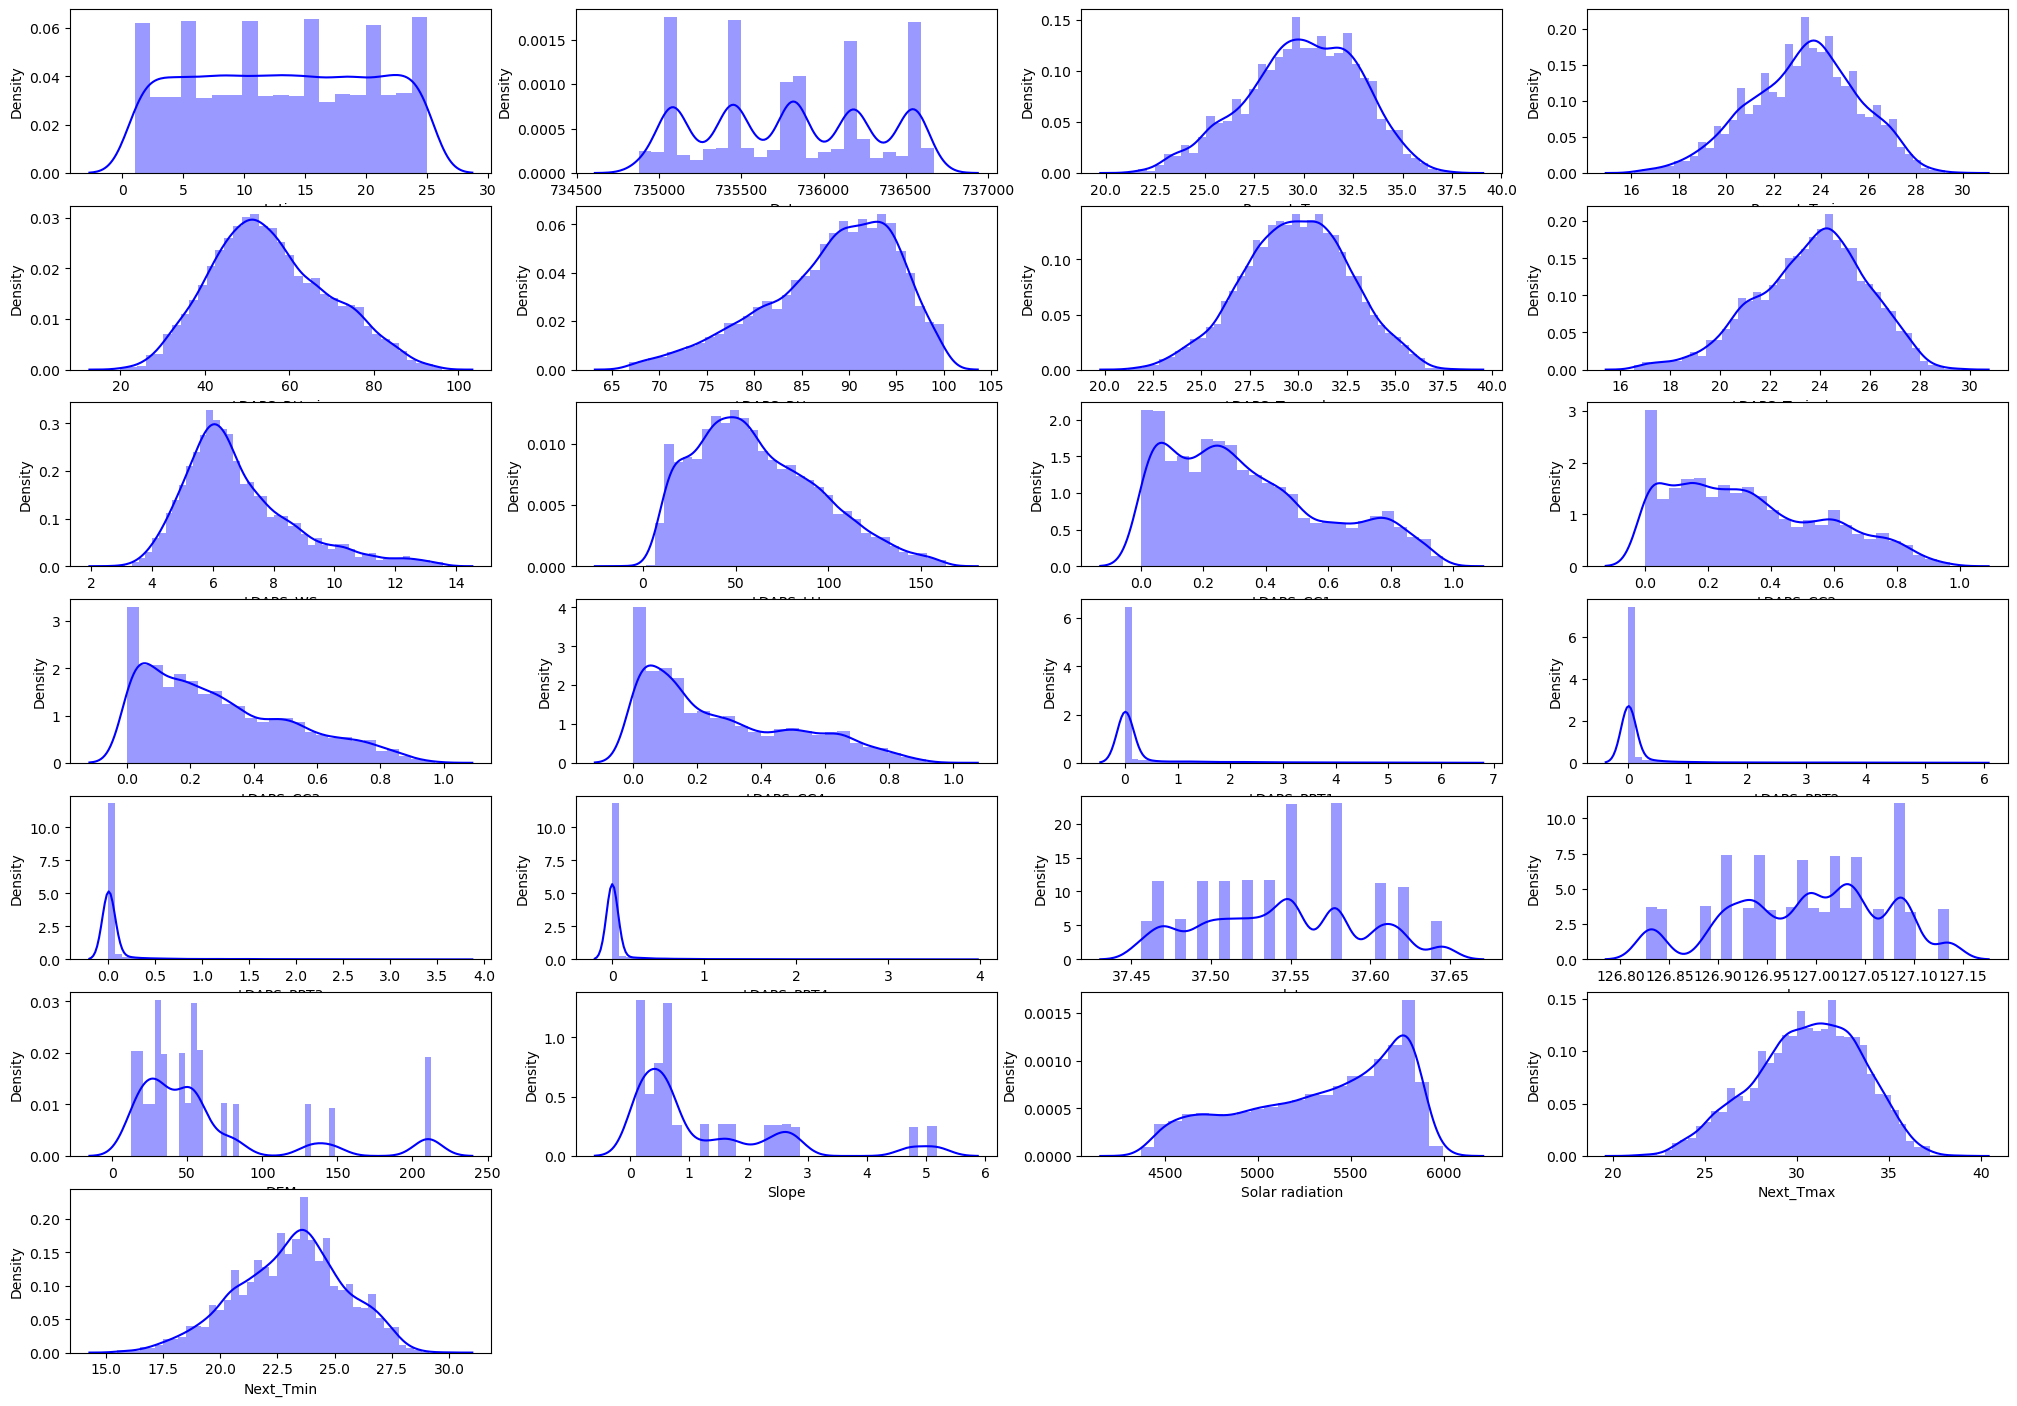

In [64]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [65]:
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

skewness more than+/- 0.5 will we treated

In [67]:
#Removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

as we can see here skewness is removed, This best result we got cant handle can't treat more

# Dividing data into X and Y

seperating both varialbes into different part

In [68]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

# scaling X values

In [71]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [70]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,...,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000,6739.000000
mean,0.502281,0.511126,0.531753,0.520243,0.468041,0.507566,0.513492,0.543201,0.622685,0.751265,...,0.433375,0.185769,0.161887,0.146186,0.124836,0.465084,0.533228,0.517318,0.457285,0.496401
std,0.300301,0.287513,0.174866,0.167222,0.181413,0.226959,0.162358,0.170643,0.154769,0.103473,...,0.290349,0.353623,0.333953,0.316520,0.301235,0.264998,0.257259,0.260310,0.309580,0.266237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.307350,0.414634,0.405797,0.337671,0.339183,0.401883,0.431959,0.524483,0.678446,...,0.179187,0.000000,0.000000,0.000000,0.000000,0.286017,0.359223,0.366947,0.169437,0.263680
50%,0.500000,0.518374,0.542683,0.528986,0.449311,0.517302,0.515788,0.559360,0.614616,0.749282,...,0.412198,0.000000,0.000000,0.000000,0.000000,0.500530,0.546926,0.543026,0.398283,0.516640
75%,0.750000,0.736080,0.664634,0.637681,0.593095,0.682132,0.628497,0.662575,0.725438,0.828262,...,0.703955,0.095642,0.035085,0.020956,0.000000,0.643008,0.699029,0.636291,0.741167,0.741522
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scalled

# MODEL BUILDING

# Next_Tmax

# Linear Regression

In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.7823758834190631  on Random_state  815


In [74]:
# spliting data 70% for train and 30% for test
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=maxRS)
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [75]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of :', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y1_test,pred)-abs(score.mean()))
    print("===============================================================================")
    print("*******************************************************************************")

*******************************************************************************
accuracy score of : LinearRegression()
R2 Score:                 0.7823758834190631
Mean Absolute Error:      1.0574369759137328
Mean Squared error:       1.8980803418878318
Root Mean Squared Error:  1.3777083660513323
[0.61048465 0.73342953 0.64933075 0.68200722 0.68627828 0.69875056
 0.78672242 0.56762198]
cross validation score:   0.6768281717111907
Difference between R2 score and cross validatio score is :   0.10554771170787236
*******************************************************************************
*******************************************************************************
accuracy score of : RandomForestRegressor()
R2 Score:                 0.9008473077226942
Mean Absolute Error:      0.7047339268051436
Mean Squared error:       0.8647928318496536
Root Mean Squared Error:  0.9299423809299443
[0.65118492 0.73833861 0.6086427  0.60198459 0.68652694 0.66329759
 0.74858033 0.56595098]
cross val

# Hyper Parameter Tuning

# with Ridge for Next_Tmax

In [76]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y1_train)
clf.best_params_  #Best parameters

{'max_iter': 20, 'random_state': 15, 'solver': 'sag'}

In [77]:
clf_pred=clf.best_estimator_.predict(x_test)
r2_score(y1_test, clf_pred)

0.7822062114427643

Our model learnt almost 78.23% for Next_Tmax

# Saving the model

In [78]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmax.obj")
RF_from_joblib=joblib.load('Temperature_Tmax.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([27.58329752, 25.94151357, 33.10632418, ..., 27.3809777 ,
       30.89800328, 31.9069608 ])

In [79]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y1_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

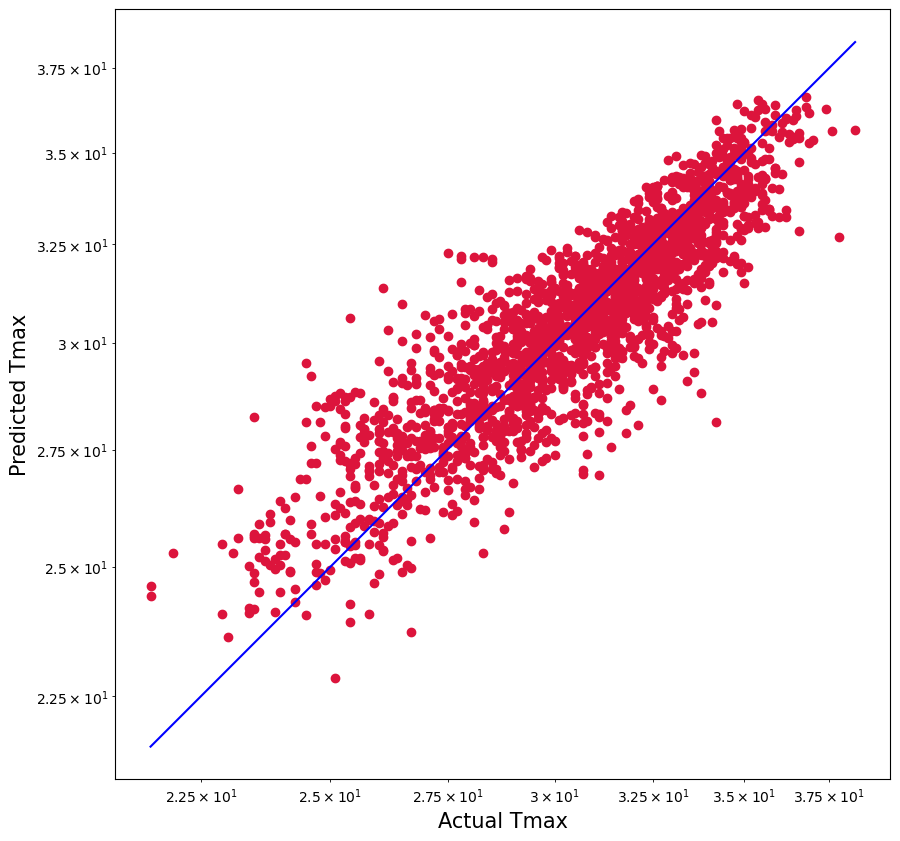

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(y1_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y1_test))
p2 = min(min(Predicted), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmax', fontsize=15)
plt.ylabel('Predicted Tmax', fontsize=15)
plt.axis('equal')
plt.show()

# With Next_Tmin

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.839939088299291  on Random_state  152


In [82]:
# spiliting data 75% train and 25% for test
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=maxRS)
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of ->', m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y2_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y2_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test,pred)))
    score=cross_val_score(m,x,y2,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y2_test,pred)-abs(score.mean()))
    print("===============================================================================")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.839939088299291
Mean Absolute Error:      0.7604827886938489
Mean Squared error:       0.9141947327713036
Root Mean Squared Error:  0.9561353109112243
[0.61836676 0.80606344 0.65668161 0.78965708 0.80528942 0.8092919
 0.83715727 0.84370258]
cross validation score:   0.7707762561725278
Difference between R2 score and cross validatio score is -  0.06916283212676322
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.9111059963935766
Mean Absolute Error:      0.548039169139466
Mean Squared error:       0.5077218979228492
Root Mean Squared Error:  0.7125460672285331
[0.56770548 0.81417087 0.69322517 0.79822986 0.80112413 0.83246345
 0.84812613 0.85992761]
cross validation score:   0.7768715875387548
Difference between R2 score and cross validati

# Hyper Parameter Tuning
with LinearRegression for Next_Tmin

In [83]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept' :[True],
             'n_jobs':[-1]}
LR=LinearRegression()

clf = GridSearchCV(LinearRegression(), parameters, cv=5)
clf.fit(x_train, y2_train)
clf.best_params_  #Best parameters

{'fit_intercept': True, 'n_jobs': -1}

In [84]:
clf_pred=clf.best_estimator_.predict(x_test)
r2_score(y2_test, clf_pred)

0.839939088299291

Our model learnt almost 83.40% for Next_Tmin

# Saving the model

In [85]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmin.obj")
RF_from_joblib=joblib.load('Temperature_Tmin.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([24.31451716, 23.42255792, 22.4590196 , ..., 26.41928131,
       25.47636032, 24.58837506])

In [86]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y2_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

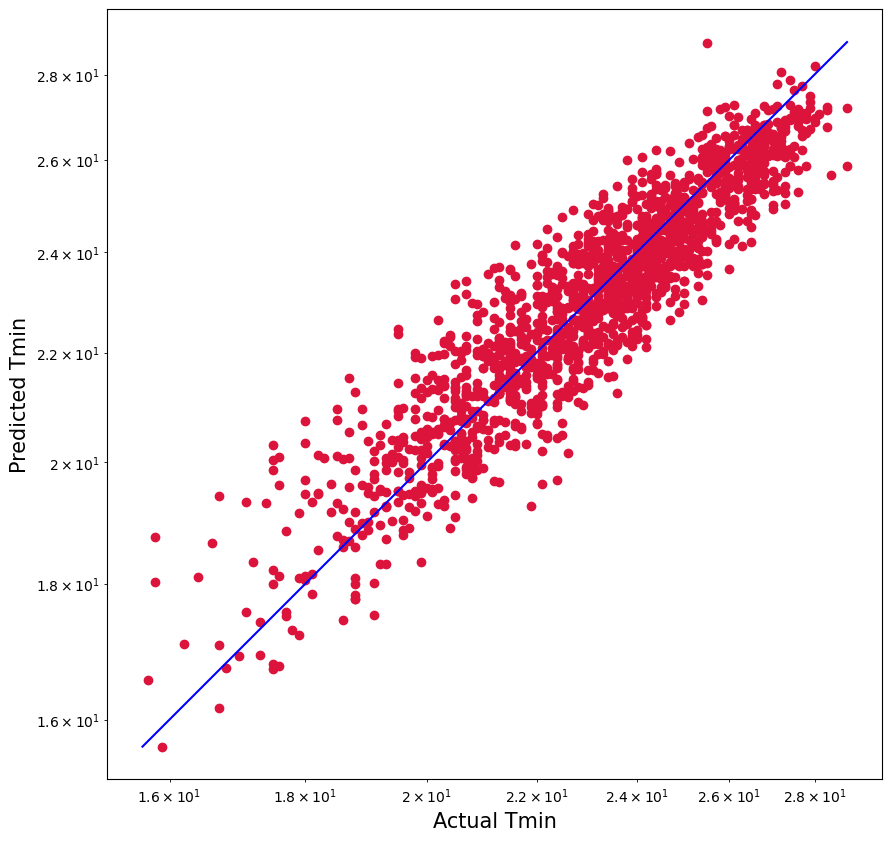

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(y2_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y2_test))
p2 = min(min(Predicted), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmin', fontsize=15)
plt.ylabel('Predicted Tmin', fontsize=15)
plt.axis('equal')
plt.show()